# Credit Card Customer Attrition Analysis and Prediction

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis (Visualizations)
- Conclusions

### 1. Problem statement
- This project aims to comprehend how the Attrition status of customers is influenced by factors such as Gender, Credit Limit, Income Category, Utilization Ratio, and variations in amount and quantity between Q4 and Q1, among others.

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction/data
- The data consists of 23 columns and 10127 rows.

#### 2.1 Import Data and Required Packages

####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/BankChurners.csv')

#### Show last 5 records

In [3]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


#### Shape of the dataset

In [4]:
df.shape

(10127, 23)

#### 2.2 Dataset information

- CLIENTNUM	: Client number. Unique identifier for the customer holding the account
- Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age : Demographic variable - Customer's Age in Years
- Gender : Demographic variable - M=Male, F=Female
- Dependent_count : Demographic variable - Number of dependents
- Education_Level : Demographic variable - Educational Qualification of the account holder (example: high school, college 
  graduate, etc.)
- Marital_Status : Demographic variable - Married, Single, Divorced, Unknown
- Income_Category : Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K,
  $80K-$120K, >)
- Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book : Period of relationship with bank
- Total_Relationship_Count : Total no. of products held by the customer
- Months_Inactive_12_mon : No. of months inactive in the last 12 months
- Contacts_Count_12_mon : No. of Contacts in the last 12 months
- Credit_Limit : Credit Limit on the Credit Card
- Total_Revolving_Bal : Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
- Total_Trans_Amt : Total Transaction Amount (Last 12 months)
- Total_Trans_Ct : Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
- Avg_Utilization_Ratio : Average Card Utilization Ratio
- Naive_Bayes_Classifier_attribution : Naive Bayes
- Naive_Bayes_Classifier_attribution : Naive Bayes

### 3. Data checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df = df.iloc[:,1:-2]

#### 3.1 Check missing values

In [6]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values in the data set

#### 3.2 Check duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the data set

#### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


#### Insights
-  The average age of customers is approximately 46 years. Most customers fall within the age range of 41 to 52 years.
- The average credit limit is approximately $8,632, with customers utilizing about 27% of their available credit on average. 
- Customers experienced an average change in transaction amount of approximately 76% from quarter 4 to quarter 1.
- The average total transaction amount is $4404, with an average transaction count of 65. 

### 4. Exploratory Data Analysis

#### 4.1 Exploring data

In [11]:
df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [12]:
# Define numerical & categorical columns
numeric_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(exclude='number').columns

# Print number of columns for each distinction
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features.values))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features.values))

We have 14 numerical features : ['Customer_Age' 'Dependent_count' 'Months_on_book'
 'Total_Relationship_Count' 'Months_Inactive_12_mon'
 'Contacts_Count_12_mon' 'Credit_Limit' 'Total_Revolving_Bal'
 'Avg_Open_To_Buy' 'Total_Amt_Chng_Q4_Q1' 'Total_Trans_Amt'
 'Total_Trans_Ct' 'Total_Ct_Chng_Q4_Q1' 'Avg_Utilization_Ratio']

We have 6 categorical features : ['Attrition_Flag' 'Gender' 'Education_Level' 'Marital_Status'
 'Income_Category' 'Card_Category']


In [13]:
#Columns that contains a considerable small amount of categorical values that could also be ordinal
#These are the columns that their unique values are present in a smaller proportion than 1% of the total records.
ord_col = df.nunique()[df.nunique() < len(df) * .01].index

In [14]:
#Print the values of ord_col sorted
for column in ord_col:
    unique_sort_values = np.unique(df[column], return_counts = False)
    print(f"{column}: {unique_sort_values}")

Attrition_Flag: ['Attrited Customer' 'Existing Customer']
Customer_Age: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 73]
Gender: ['F' 'M']
Dependent_count: [0 1 2 3 4 5]
Education_Level: ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status: ['Divorced' 'Married' 'Single' 'Unknown']
Income_Category: ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Platinum' 'Silver']
Months_on_book: [13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]
Total_Relationship_Count: [1 2 3 4 5 6]
Months_Inactive_12_mon: [0 1 2 3 4 5 6]
Contacts_Count_12_mon: [0 1 2 3 4 5 6]


#### 4.2 Visualizations

##### 4.2.1 Distribution of the numerical and categorical features and draw some conclusions. 
- Histogram with KDE
- Boxplot

##### Distributions of All Numerical Features

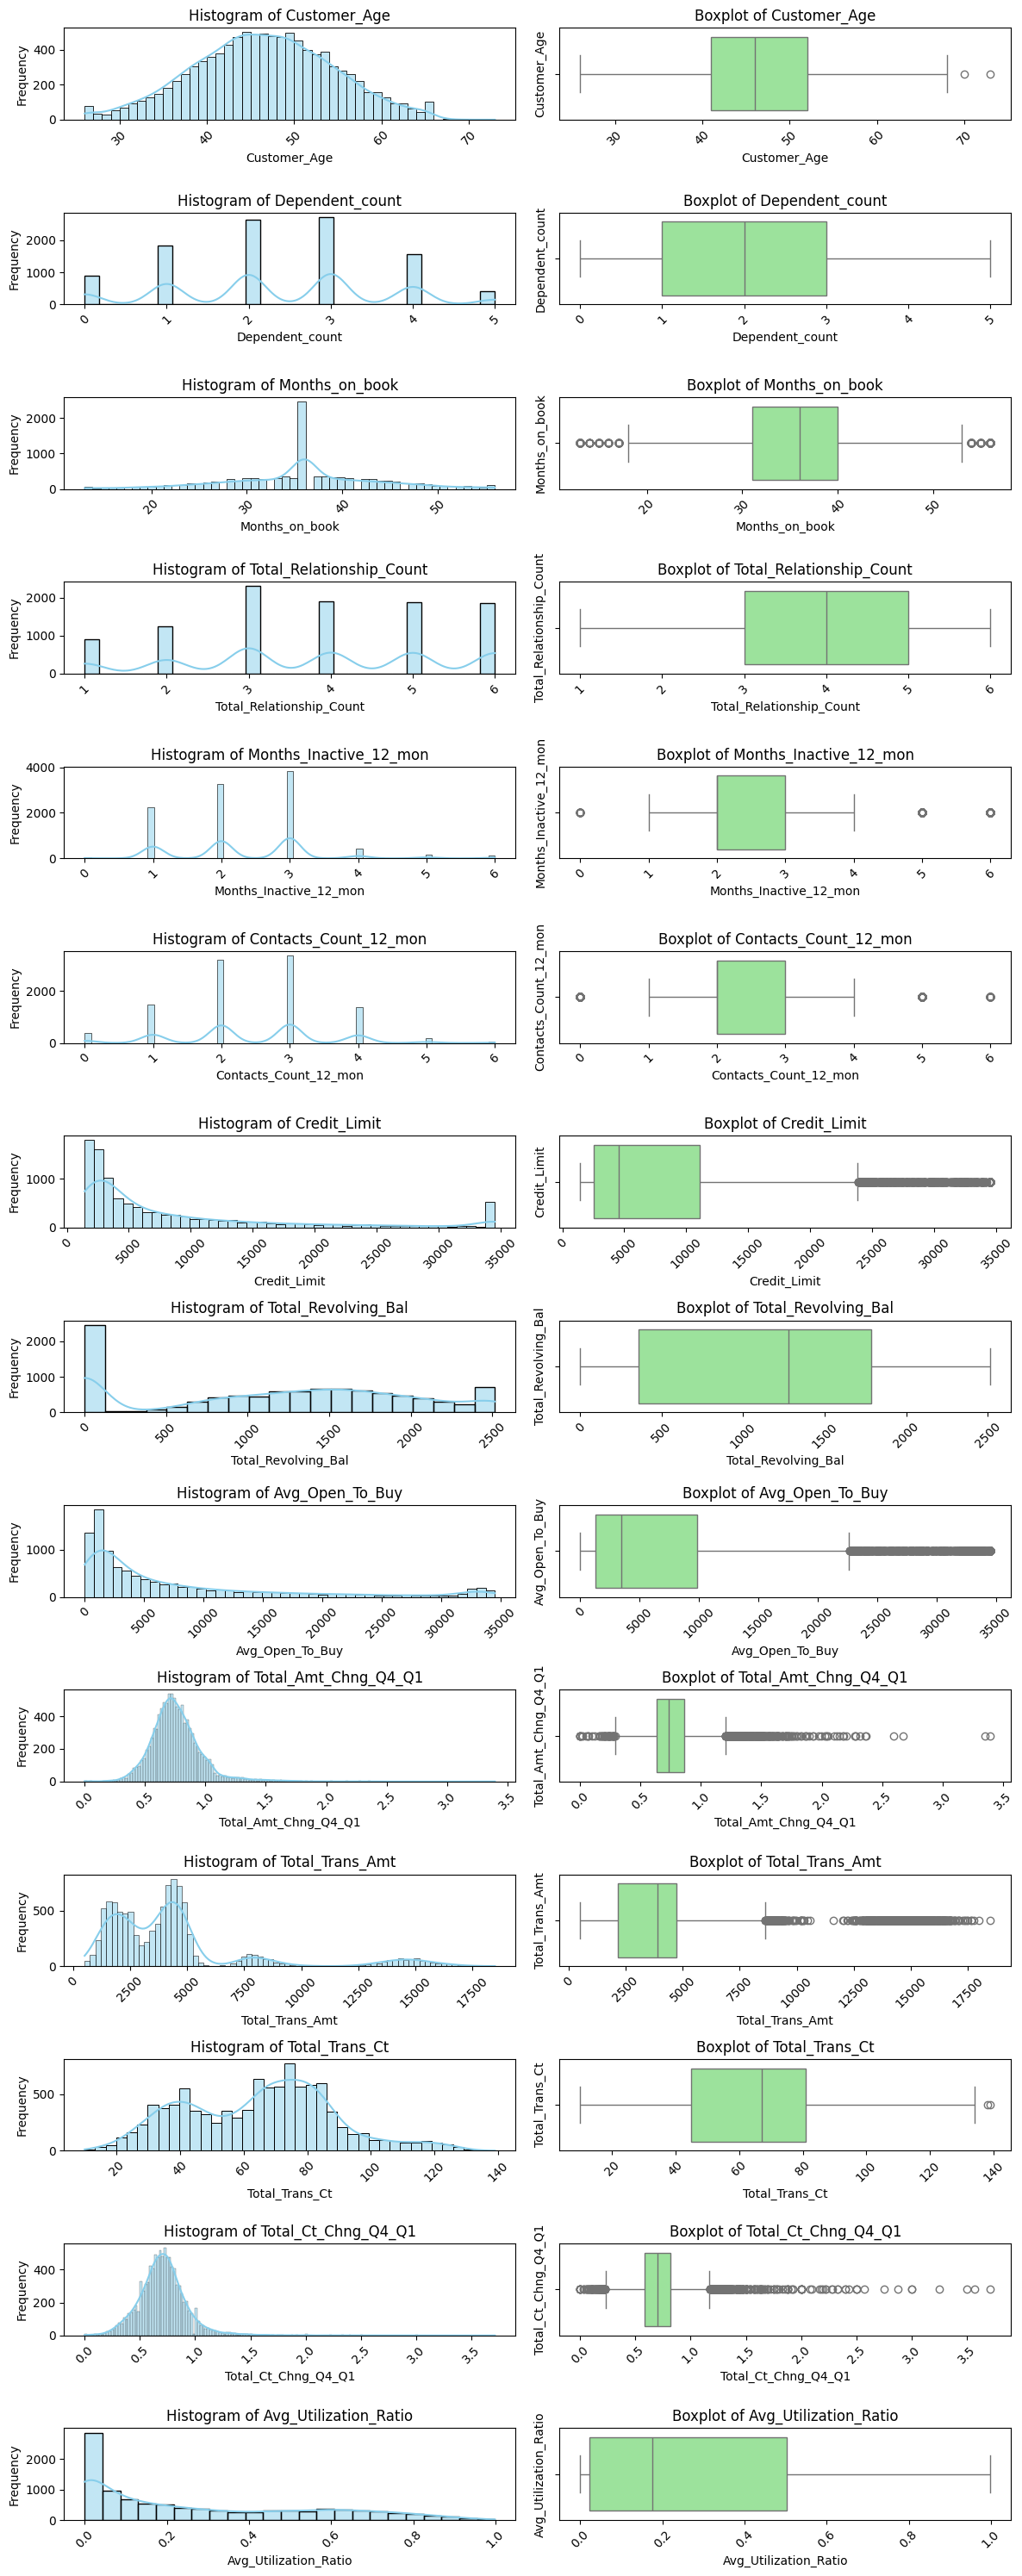

In [15]:
# Create subplots
nrows = len(numeric_features)
fig, axes = plt.subplots(nrows, 2, figsize=(12, 30))
axes = axes.flatten()

# Iterate over each feature
for i, column in enumerate(df[numeric_features]):
    
    # Histogram
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    axes[2*i].set_xticklabels(axes[2*i].get_xticklabels(), rotation=45)
    
    # Boxplot
    sns.boxplot(x=df[column], color='lightgreen', orient='v', ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Boxplot of {column}')
    axes[2*i+1].set_ylabel(column)
    axes[2*i+1].set_xticklabels(axes[2*i].get_xticklabels(), rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##### Insights:
- Many features exhibit skewed or non-normal distributions. This can be observed from the asymmetric shapes of their histograms.
- There are several outliers present in some features as indicated by the boxplots with points outside the whiskers.
- Some features, such as Avg_Utilization_Ratio, appear to have a more uniform or evenly distributed pattern based on the shape of the histogram.

##### Distributions of All Categorical Features

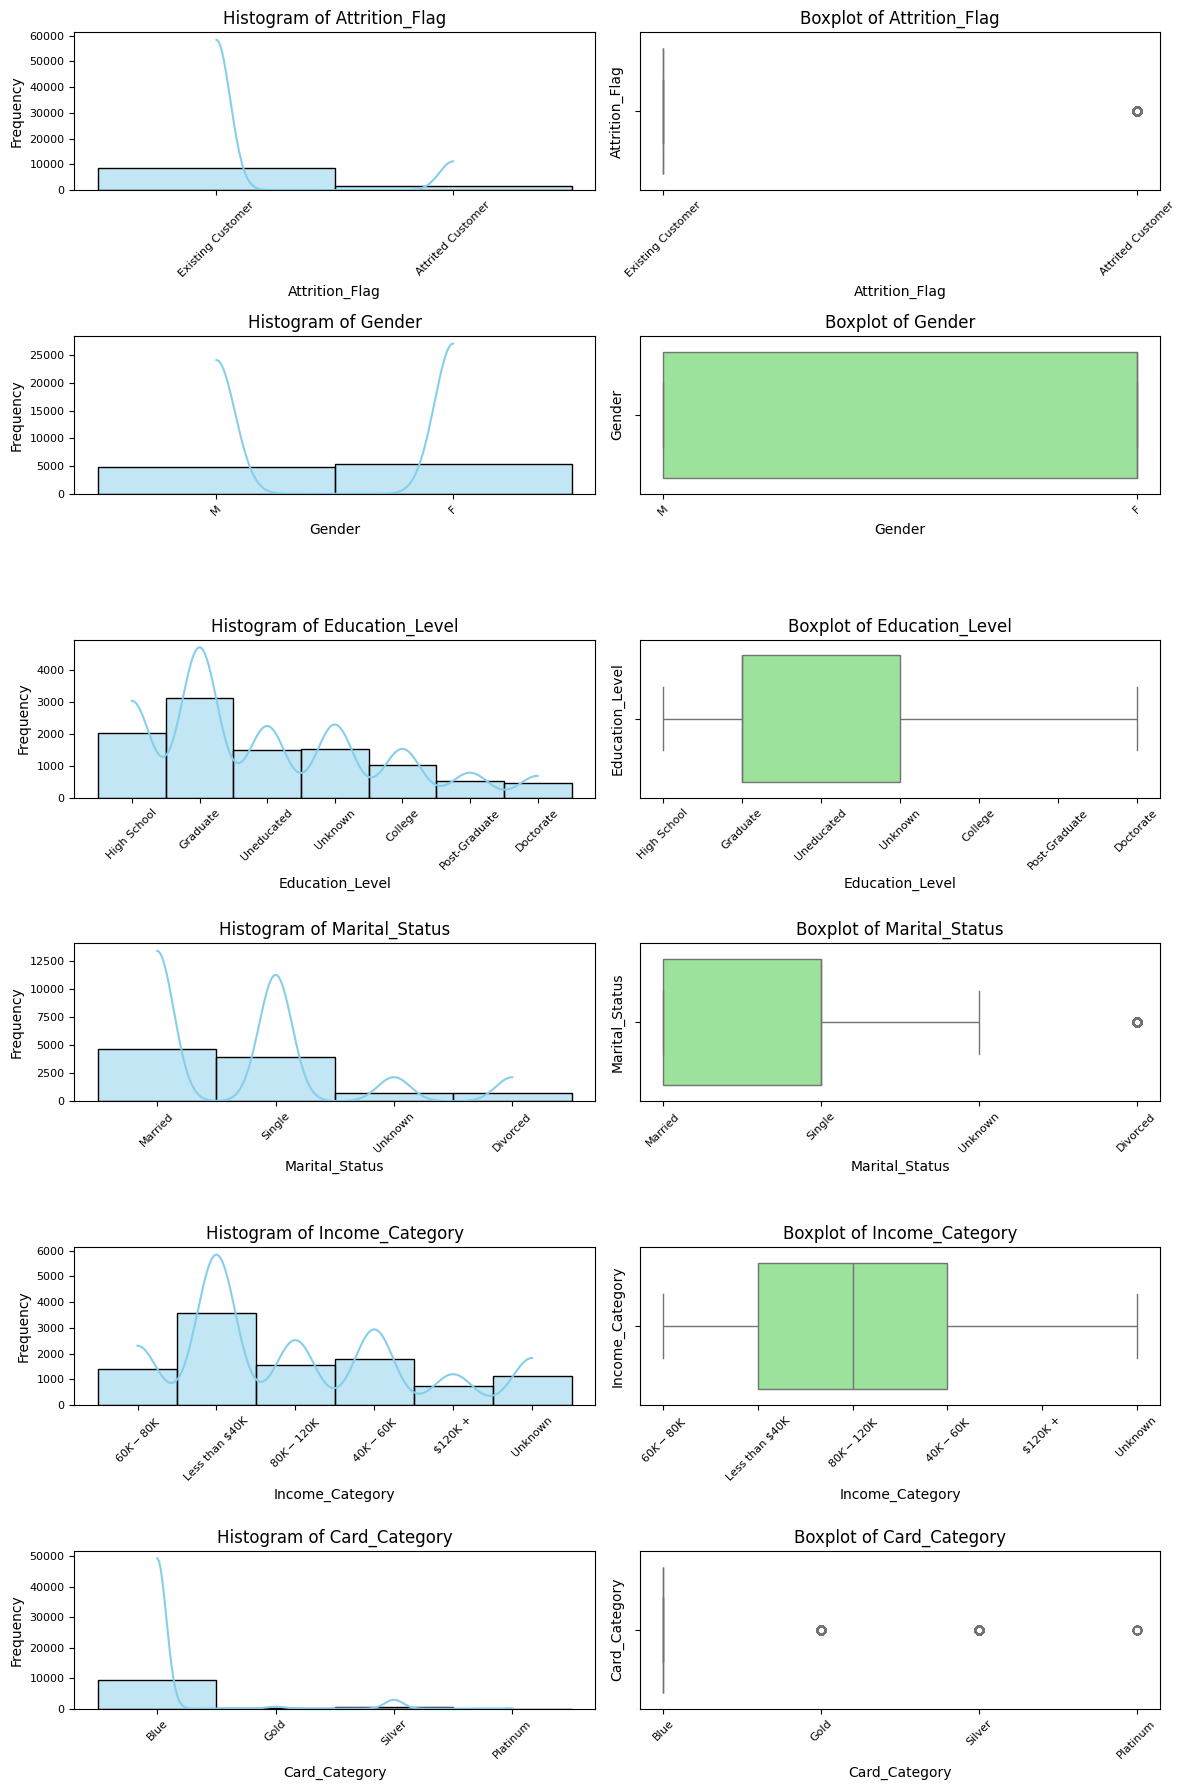

In [16]:
# Create subplots
nrows = len(categorical_features)
fig, axes = plt.subplots(nrows, 2, figsize=(12, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()


# Iterate over each feature
for i, column in enumerate(df[categorical_features]):
    
    # Histogram
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[2*i])
    axes[2*i].set_title(f'Histogram of {column}')
    axes[2*i].set_xlabel(column)
    axes[2*i].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(x=df[column], color='lightgreen', orient='v', ax=axes[2*i+1])
    axes[2*i+1].set_title(f'Boxplot of {column}')
    axes[2*i+1].set_ylabel(column)

    # Rotate x-axis labels
    axes[2*i].set_xticklabels(axes[2*i].get_xticklabels(), rotation=45)
    axes[2*i+1].set_xticklabels(axes[2*i+1].get_xticklabels(), rotation=45)
    
    # Adjust tick parameters
    axes[2*i].tick_params(axis='both', labelsize=8)
    axes[2*i+1].tick_params(axis='both', labelsize=8)

# Adjust layout and show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Insights
- Attrition_Flag: The histogram shows a heavily skewed distribution, with a vast majority of customers falling under the "Existing Customer" category, indicating low attrition rates in the dataset.
- Gender: The histogram shows a slightly higher frequency of female customers compared to male customers, indicating a potential skew in the gender distribution of the customer base.
- Education Level: The histogram reveals that the majority of customers have either a 'High School' or a 'Graduate' level of education, with fewer customers in the other education categories.
- Marital Status: The histogram indicates that a large portion of customers are 'Married', followed by a significant number of 'Single' customers. The 'Divorced' and 'Unmarried' categories have relatively lower frequencies.

#### 4.2.2 Other interesting visualizations

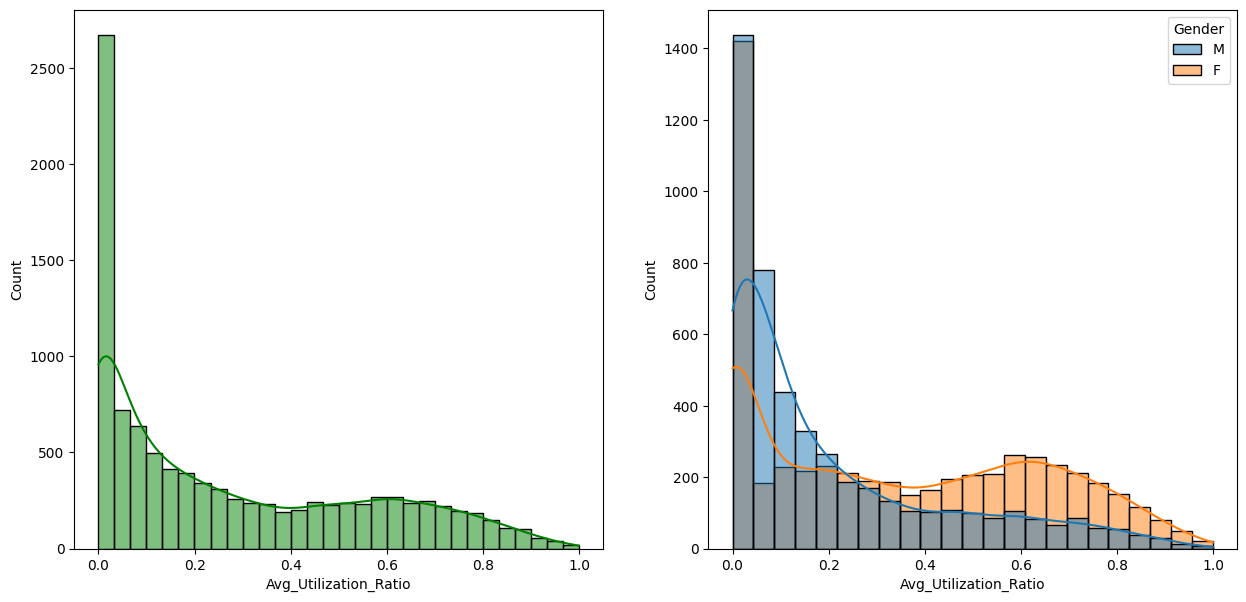

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Avg_Utilization_Ratio',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_Utilization_Ratio',kde=True,hue='Gender')
plt.show()

#####  Insights
- Female customers tend to use more the available credit.

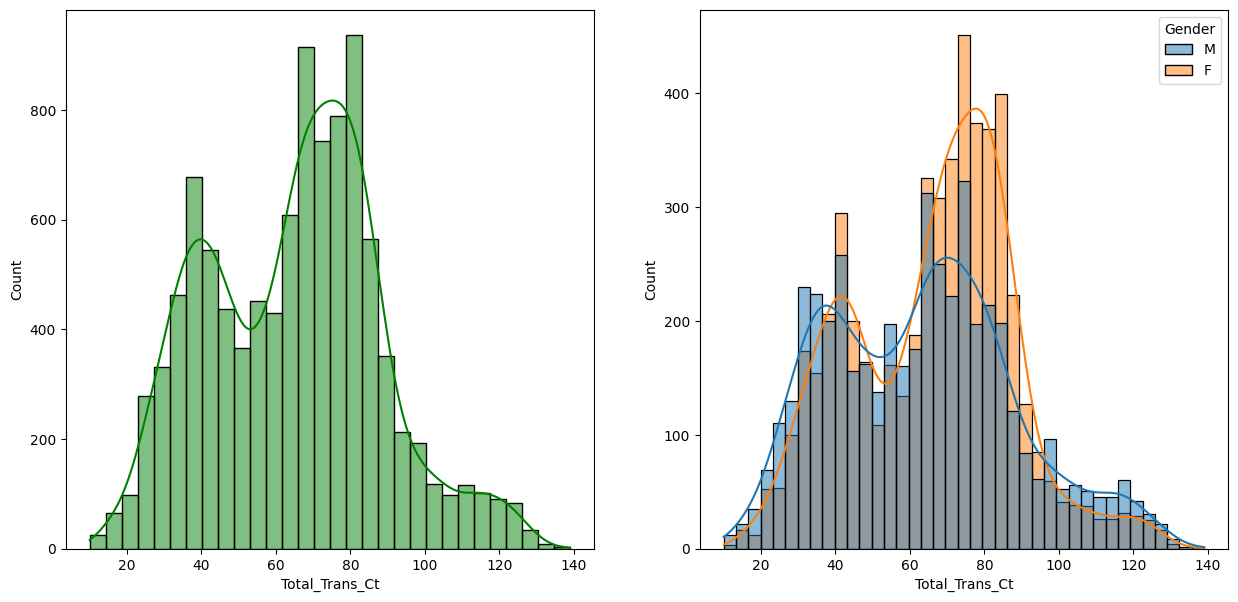

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Trans_Ct',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Trans_Ct',kde=True,hue='Gender')
plt.show()

#####  Insights
- Female customers tend to make more transactions than male customers.

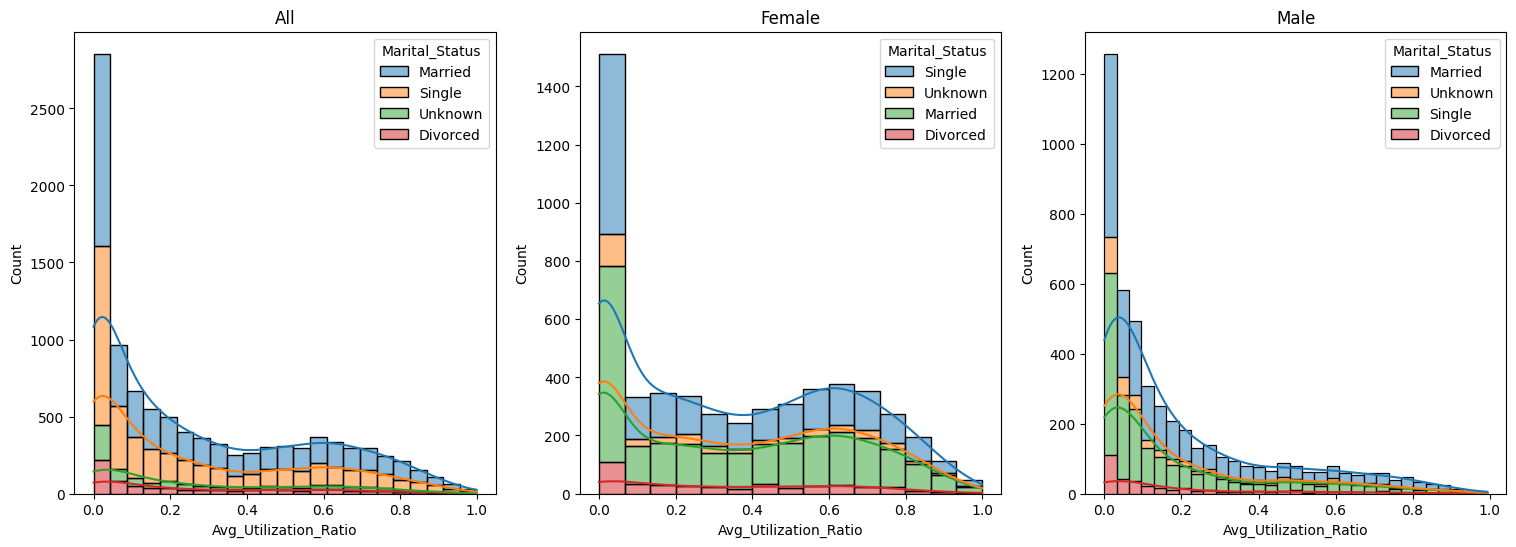

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg_Utilization_Ratio',kde=True,hue='Marital_Status', multiple='stack').set_title('All')
plt.subplot(142).set_title('Female')
sns.histplot(data=df[df.Gender=='F'],x='Avg_Utilization_Ratio',kde=True,hue='Marital_Status', multiple='stack')
plt.subplot(143).set_title('Male')
sns.histplot(data=df[df.Gender=='M'],x='Avg_Utilization_Ratio',kde=True,hue='Marital_Status', multiple='stack')
plt.show()

#####  Insights
- The majority of the customers are single or married.
- There are more married female customers in the majority utilization of their credit compare to single female customers.
- There are more married and single male customers with low utilization ratio.

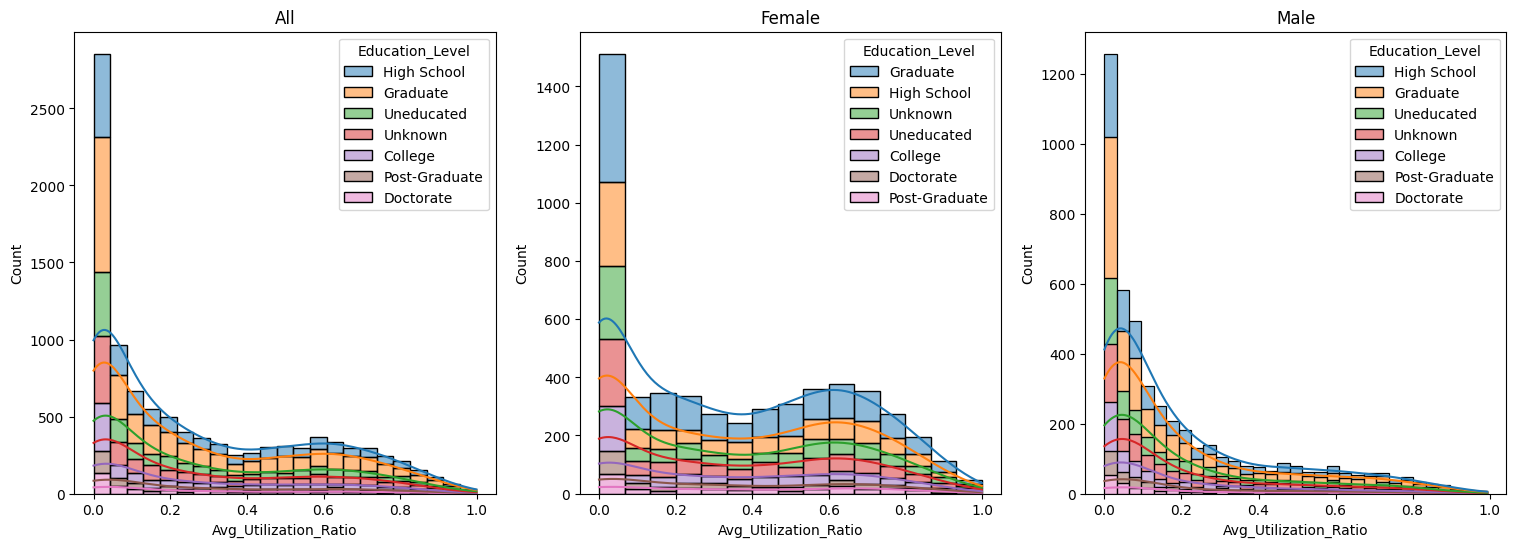

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg_Utilization_Ratio',kde=True,hue='Education_Level', multiple='stack').set_title('All')
plt.subplot(142)
ax =sns.histplot(data=df[df.Gender=='F'],x='Avg_Utilization_Ratio',kde=True,hue='Education_Level', multiple='stack').set_title('Female')
plt.subplot(143)
ax =sns.histplot(data=df[df.Gender=='M'],x='Avg_Utilization_Ratio',kde=True,hue='Education_Level', multiple='stack').set_title('Male')
plt.show()

#####  Insights
- The majority of customers with the highest credit utilization of both genders are graduated.
- The use of credit seems to maintain its distribution for gender across the different educational levels.
- While higher levels of credit utilization are less common for any level of education, the proportions of the education levels remain consistent in both genders.

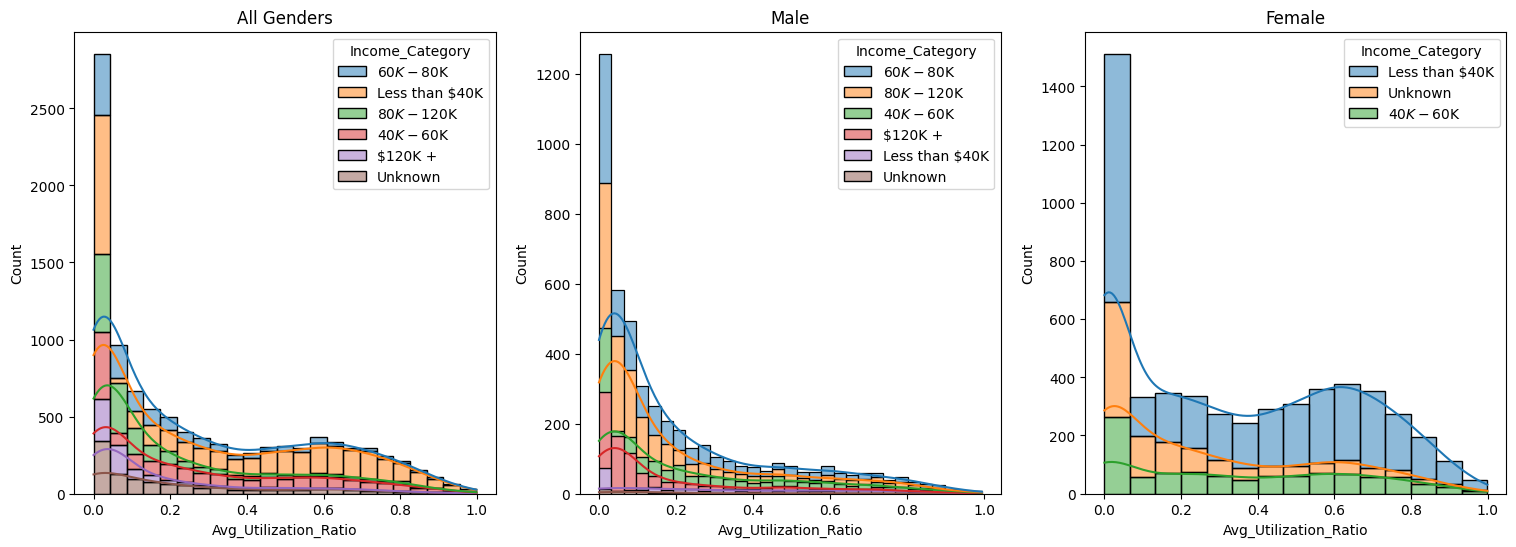

In [21]:
# Create subplots
plt.subplots(1, 3, figsize=(25, 6))

# Plot histograms
plt.subplot(141)
ax = sns.histplot(data=df, x='Avg_Utilization_Ratio', kde=True, hue='Income_Category', multiple='stack')
plt.title('All Genders')
plt.subplot(142)
ax = sns.histplot(data=df[df.Gender == 'M'], x='Avg_Utilization_Ratio', kde=True, hue='Income_Category', multiple='stack')
plt.title('Male')
plt.subplot(143)
ax = sns.histplot(data=df[df.Gender == 'F'], x='Avg_Utilization_Ratio', kde=True, hue='Income_Category', multiple='stack')
plt.title('Female')

# Show plot
plt.show()

#####  Insights
- Among female clients, the distribution by income category is limited, including only three of the six categories. Females in the 'Less than $40k category' appear more prevalent compared to males.
- Male customers consistently exhibit a declining pattern of credit utilization across various income categories.

#### 4.3 Features Analysis

##### 4.3.1 Maximumum values of customers in numeric features

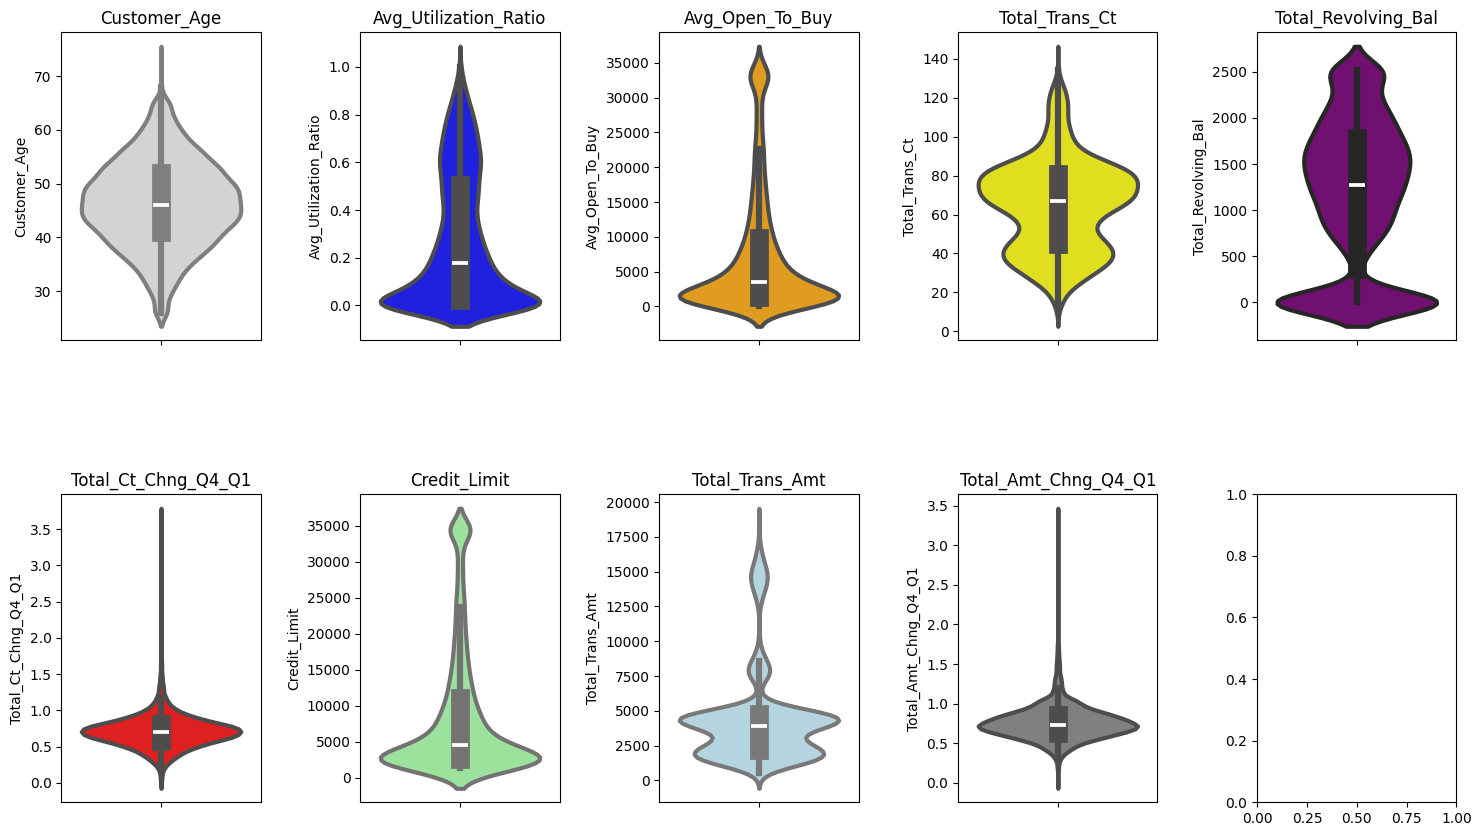

In [22]:
colors = ['lightgray', 'blue', 'orange', 'yellow', 'purple', 'red', 'lightgreen', 'lightblue', 'gray']

# Create a list of column names
column_names = ['Customer_Age', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Total_Trans_Ct', 'Total_Revolving_Bal',
                'Total_Ct_Chng_Q4_Q1', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1']

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 10))

# Flatten the axes array
axes = axes.flatten()

# Loop through columns and create violinplots
for i, (ax, col_name) in enumerate(zip(axes, column_names)):
    sns.violinplot(y=col_name, data=df, color=colors[i], linewidth=3, ax=ax)
    ax.set_title(col_name)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

##### Insights
- Most of the distributions appear to be right-skewed, indicating the presence of outliers or extreme values on the higher end of the scale. This is particularly evident in plots like 'Avg_Open_To_Buy' and 'Credit_Limit'.
- The 'Total_Ct_Chng_Q4_Q1' and 'Total_Amt_Chng_Q4_Q1' plots appear to have both positive and negative values, indicating potential increases and decreases in transaction counts and amounts between Q4 and Q1.

##### 4.3.2 Analysis of categorical features using Pieplot

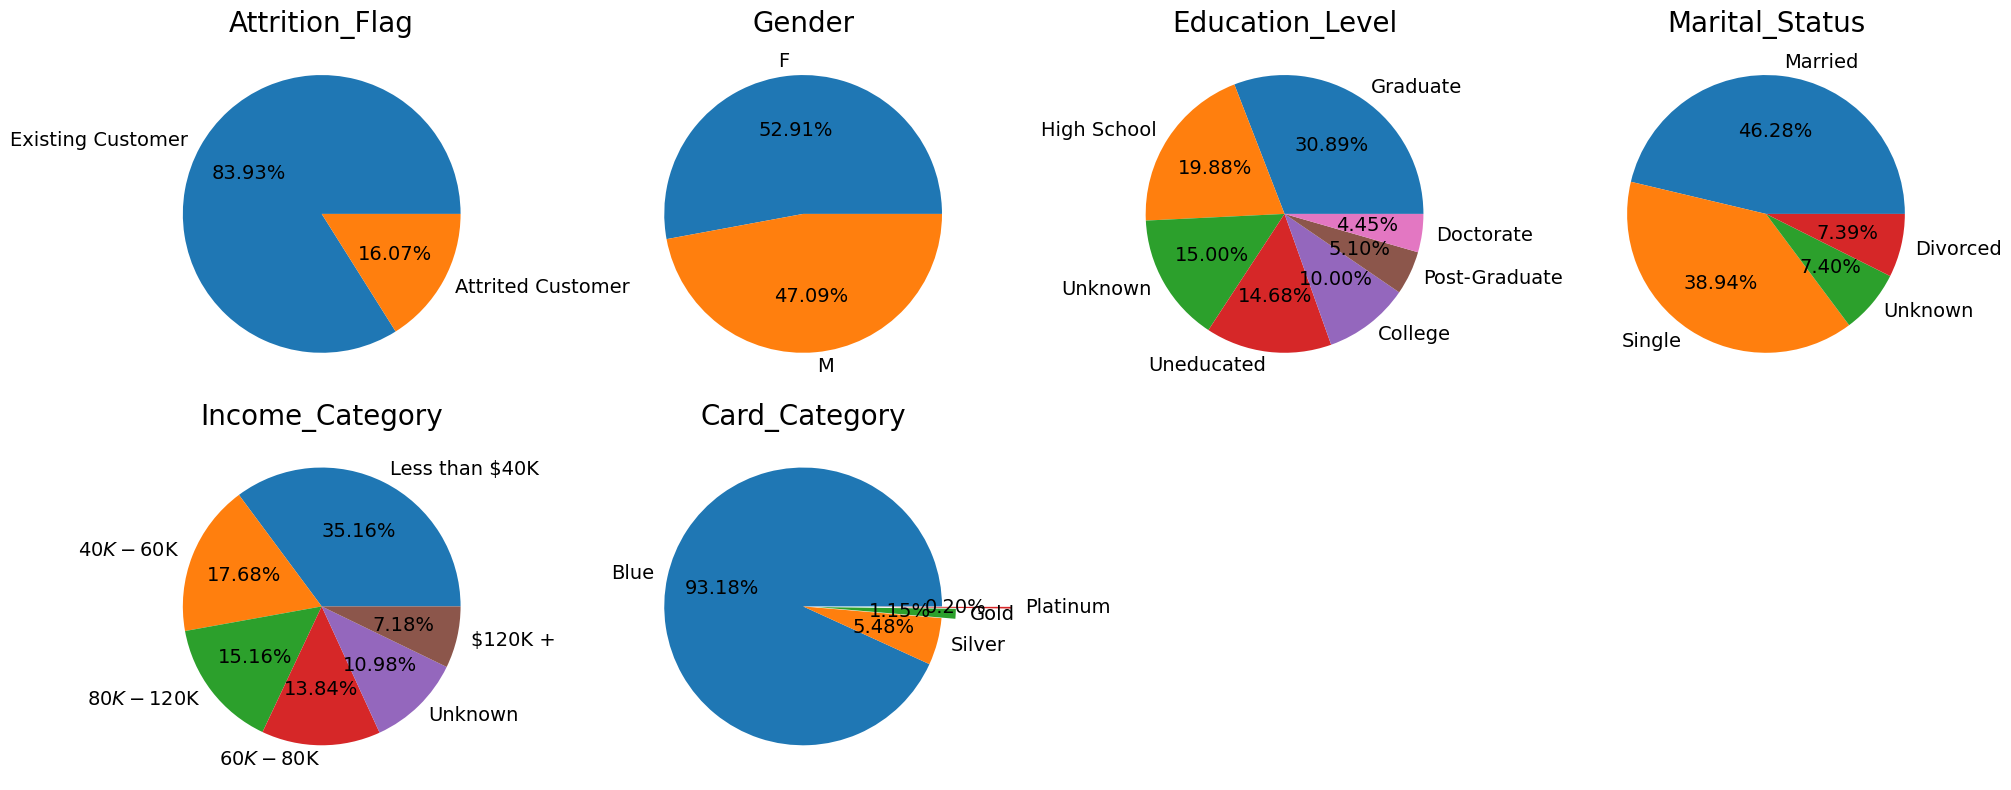

In [23]:
# Set figure size
plt.rcParams['figure.figsize'] = (20, 8)

# Calculate number of rows needed for the grid
num_features = len(categorical_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate counts and labels
    size = df[feature].value_counts()
    labels = size.index
    
    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Plot pie chart
    if i == num_features - 1:  # Check if it's the last pie chart
        explode = [0, 0, 0.1, 0.5]  # Define explode values
        axes[i].pie(size, labels=labels, autopct='%.2f%%', explode=explode, textprops={'fontsize': 14})
    else:
        axes[i].pie(size, labels=labels, autopct='%.2f%%', textprops={'fontsize': 14})
        
    axes[i].set_title(feature, fontsize=20)
    axes[i].axis('off')

# Hide empty subplots
for i in range(num_features, num_rows*num_cols):
    axes[i].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.grid()
plt.show()

#####  Insights
- There are nearly five times as many existing customers as there are attrited customers.
- The number of male and female clients is very similar.
- The highest number of customers is found among those with a 'Graduate' Education_Level.
- The number of married clients is greater.
- The number of clients in the 'Less than 40K' Income_Category is higher.
- The majority of customers have a Card_Category of 'Blue'.

#### 4.4 Feature wise Visualization

##### 4.4.1 Gender column
- How is distribution of Gender?
- Does gender has any impact on credit average utilization?

##### Univariate Analysis: Distribution of Gender

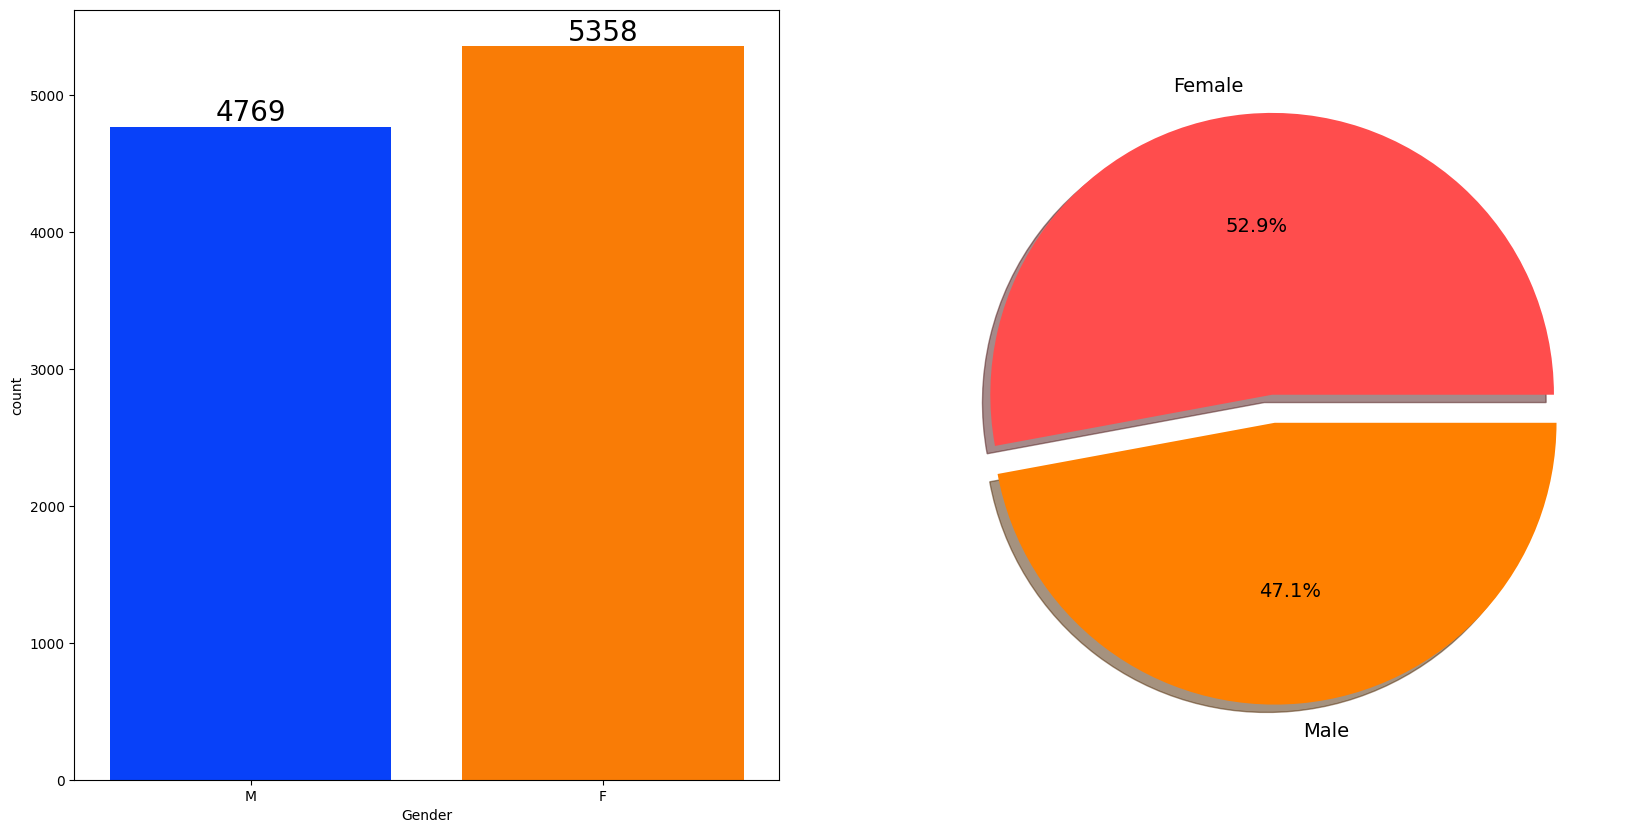

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize':14})
plt.show()

##### Insights 
- Gender data is fairly balanced, with female customers comprising 5,358 (52.9%) and male customers comprising 4,769 (47.1%).

##### Bivariate Analysis: Impact of Gender on Credit Limit and Open-to-Buy Line

In [25]:
gender_group = df.groupby('Gender')[numeric_features].mean()

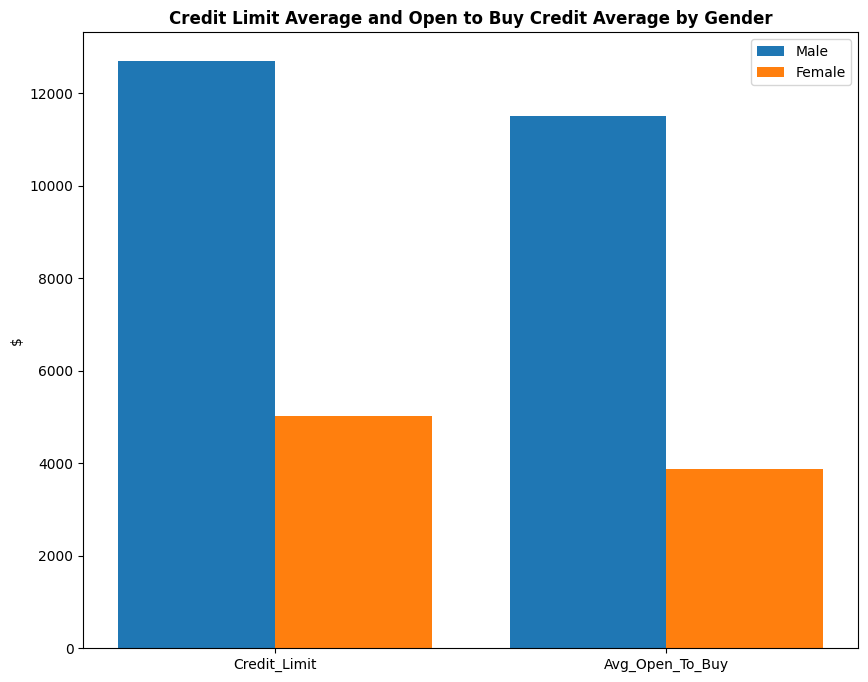

In [26]:
plt.figure(figsize=(10, 8))

X = ['Credit_Limit','Avg_Open_To_Buy']


female_values = [gender_group['Credit_Limit'][0], gender_group['Avg_Open_To_Buy'][0]]
male_values = [gender_group['Credit_Limit'][1], gender_group['Avg_Open_To_Buy'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_values, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_values, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("$")
plt.title("Credit Limit Average and Open to Buy Credit Average by Gender", fontweight='bold')
plt.legend()
plt.show()

##### Insights 
- In general, females tend to have approximately 2.5 times lower credit limits and available credit for purchases (open to buy) compared to males.

##### 4.4.2 Marital Status column
- How is Marital_Status distribution?
- Does Marital Status has any impact on customer's behavior?

##### Univariate Analysis: Distribution of Marital Status

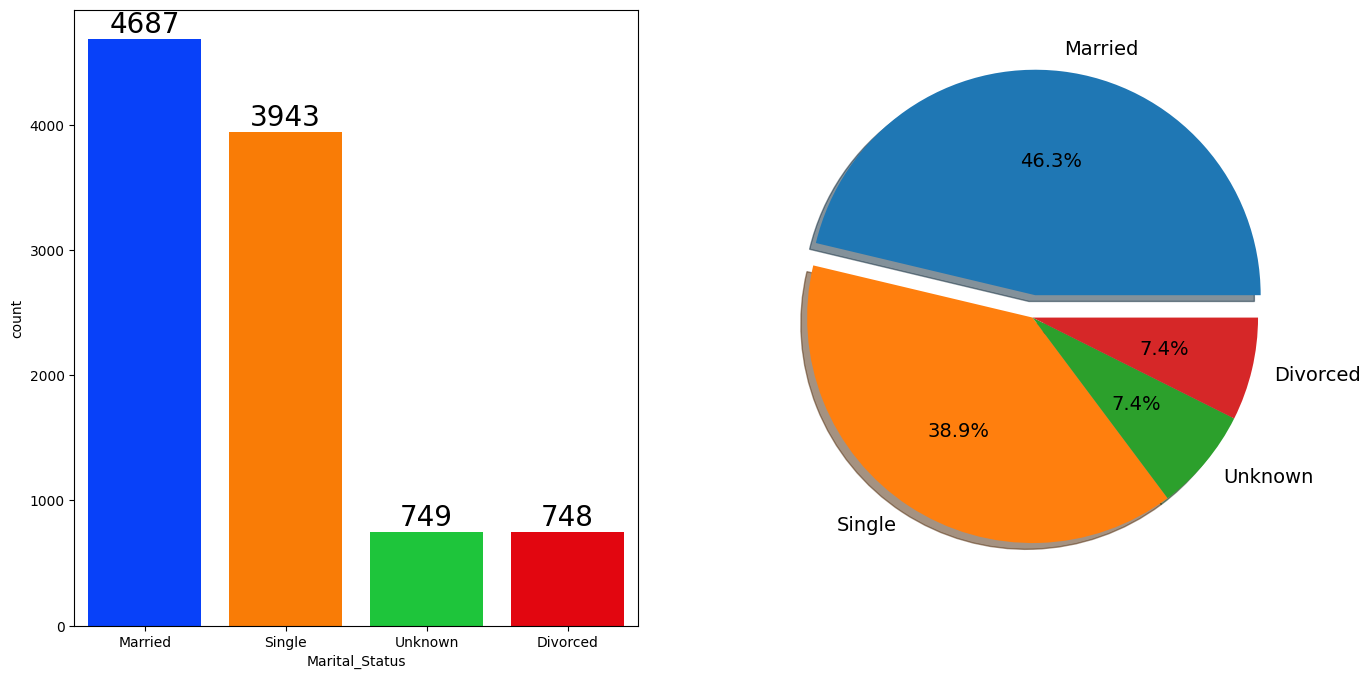

In [27]:
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot(x=df['Marital_Status'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['Marital_Status'].value_counts(),labels=df['Marital_Status'].value_counts().index,explode=[0.1, 0, 0, 0],autopct='%1.1f%%',shadow=True, textprops={'fontsize': 14})
plt.show()

##### Insights 
- More of 80% of the customers are married or single.
- There are more than 6 times more married clients than divorced.

##### Bivariate Analysis: Influence of Marital Status on Customer Behavior

In [28]:
mar_stat_group=df.groupby('Marital_Status')[numeric_features]

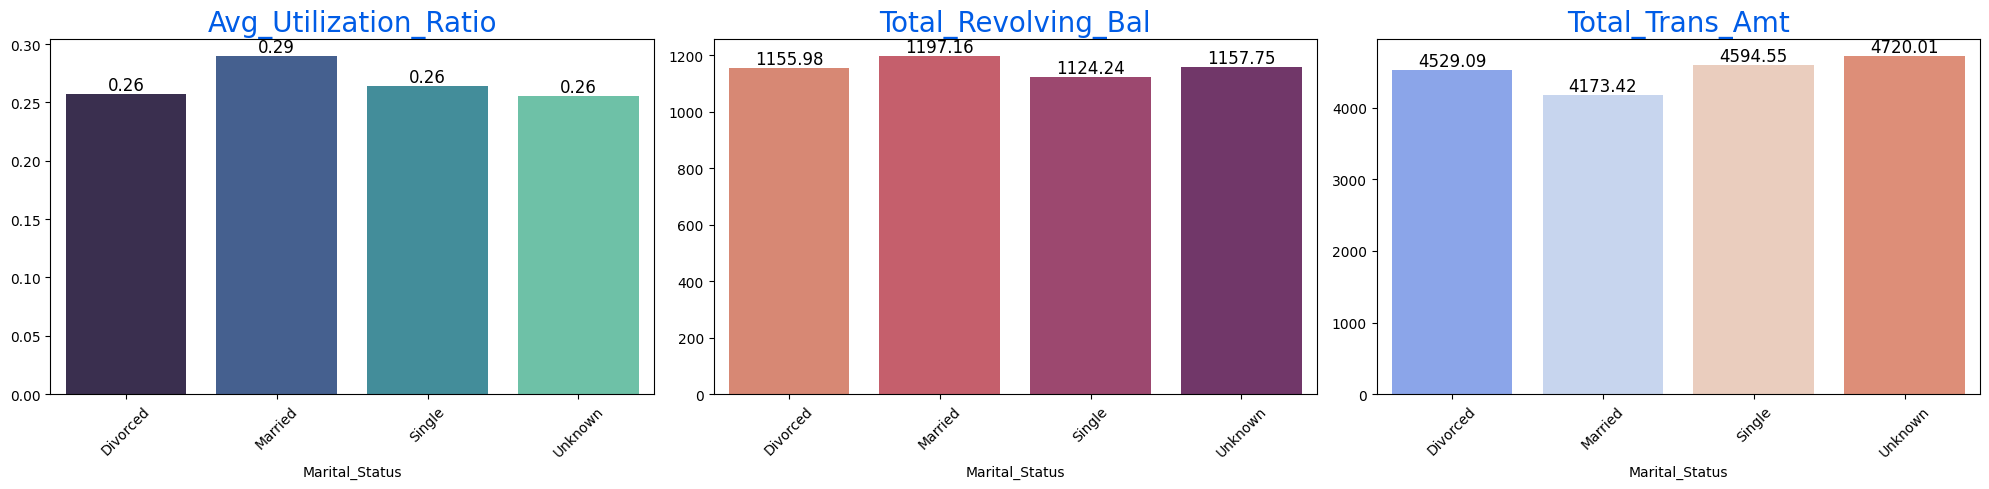

In [29]:
# Set up the matplotlib figure and axes
f, ax = plt.subplots(1, 3, figsize=(20, 5))

# Titles for each subplot
titles = ['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Trans_Amt']

# Palettes for each subplot
palettes = ['mako', 'flare', 'coolwarm']

# Calculate the mean values once to avoid repetition
mean_values = {
    'Avg_Utilization_Ratio': mar_stat_group.mean()['Avg_Utilization_Ratio'],
    'Total_Revolving_Bal': mar_stat_group.mean()['Total_Revolving_Bal'],
    'Total_Trans_Amt': mar_stat_group.mean()['Total_Trans_Amt']
}

# Loop through the axes, titles, and palettes to create each subplot
for i, (title, palette) in enumerate(zip(titles, palettes)):
    # Get the x (index) and y (values) data for the barplot
    x_data = mean_values[title].index
    y_data = mean_values[title].values
    
    # Create the barplot on the current axis
    sns.barplot(x=x_data, y=y_data, palette=palette, ax=ax[i])
    
    # Set title with specified color and size
    ax[i].set_title(title, color='#005ce6', size=20)
    
    # Rotate the x-tick labels for better readability
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    
    # Add bar labels
    for container in ax[i].containers:
        ax[i].bar_label(container, color='black', size=12, fmt='%.2f')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

##### Insights 
- Married customers have the highest credit engagement, with the top utilization ratio and revolving balances, suggesting more active or extensive credit use.

- Single customers lead in spending, with the highest average transaction amounts, hinting at either more frequent or larger purchases.

##### 4.4.3 Education Level Column
- What is educational background of customers?
- Is education level has any impact on customers transactions?

##### Univariate Analysis: Educational Background

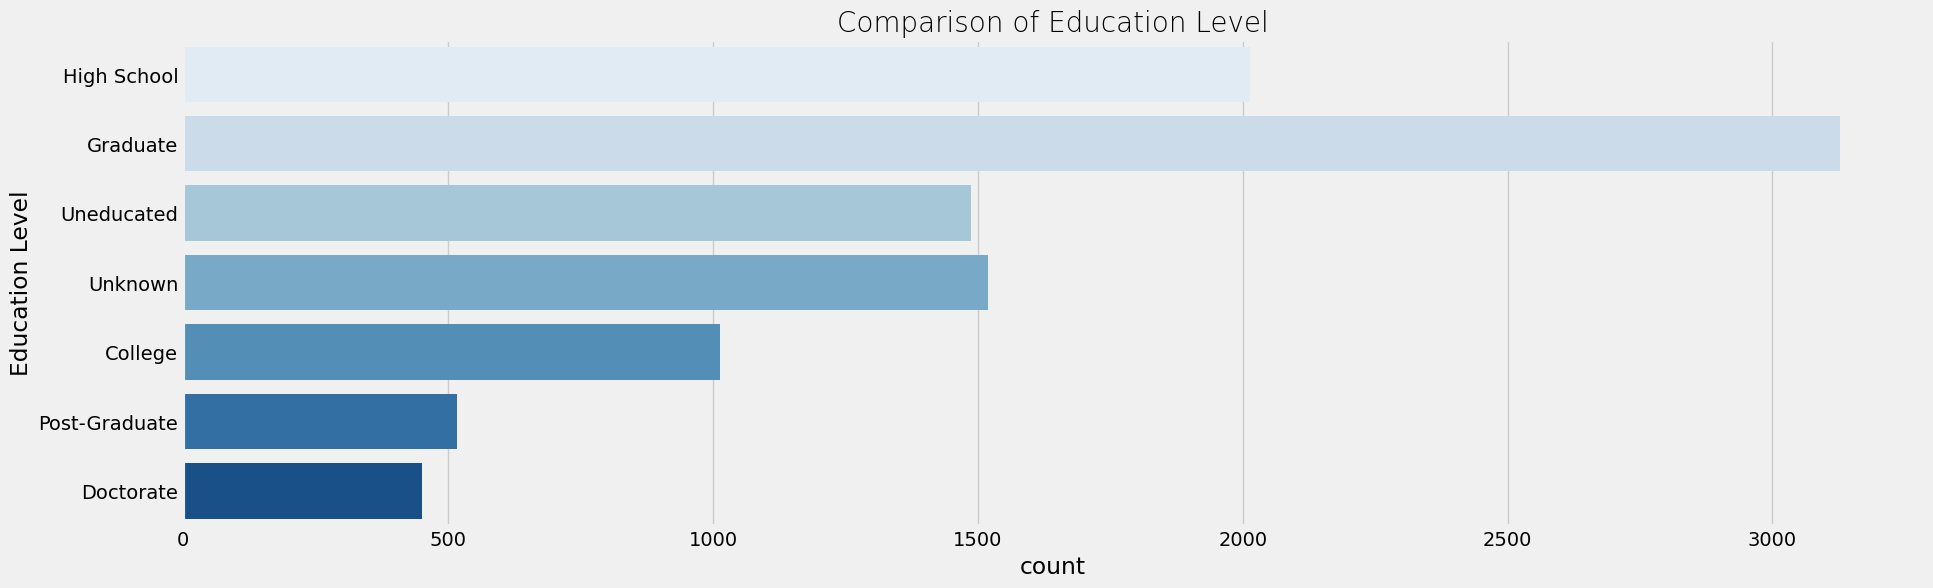

In [30]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('fivethirtyeight')
sns.countplot(df['Education_Level'], palette = 'Blues')
plt.title('Comparison of Education Level', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('Education Level')
plt.show()

##### Insights 
- There's a dominance of graduate-level customers.

##### Bivariate Analysis: Influence of Education Level on Credit Utilization

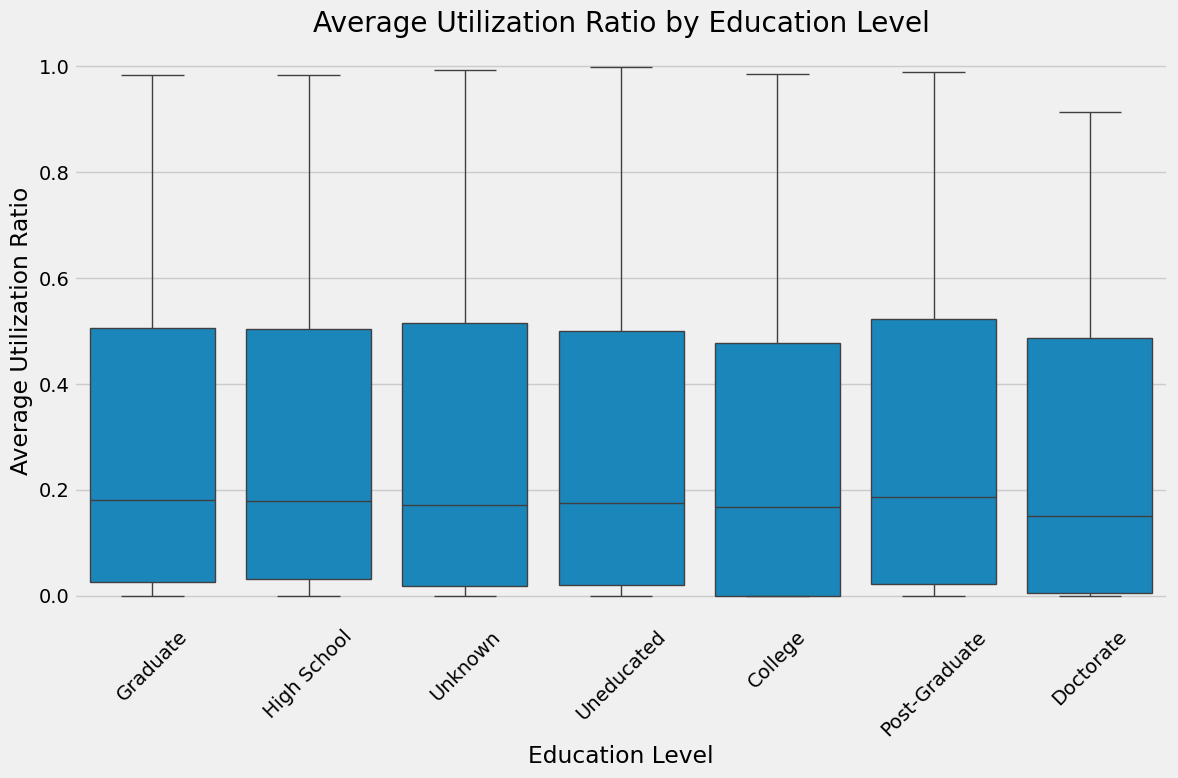

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Education_Level', y='Avg_Utilization_Ratio', order=df['Education_Level'].value_counts().index)
plt.title('Average Utilization Ratio by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Utilization Ratio')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### Insights 
- The credit utilization is very similar across the different education levels, suggesting education does not significantly differentiate how much of their available credit individuals typically use.

##### 4.4.4 Income Category and Card Category Columns
- What types of income are the most common among customers?
- What is the effect of card type on customer's transactions behavior?

##### Univariate Analysis: Income and Card Categories Among Customers

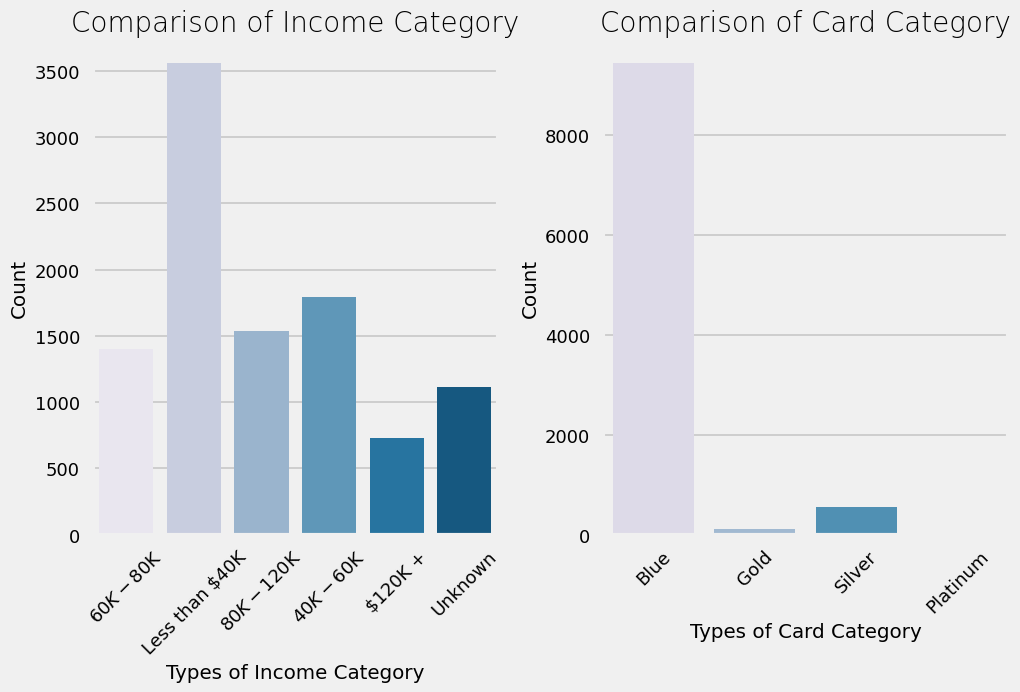

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Plot 1: Income_Category
sns.countplot(x='Income_Category', data=df, palette='PuBu', ax=axes[0])
axes[0].set_title('Comparison of Income Category', fontweight=30, fontsize=20)
axes[0].set_xlabel('Types of Income Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Card_Category
sns.countplot(x='Card_Category', data=df, palette='PuBuGn', ax=axes[1]) 
axes[1].set_title('Comparison of Card Category', fontweight=30, fontsize=20)
axes[1].set_xlabel('Types of Card Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Insights 
- In the Income Category plot, he 'Less than $40K' income bracket has the highest number of customers.

- In the Card Category plot, customers predominantly hold the Blue card, while the premium cards (Gold, Silver, Platinum) are less common.

##### Multivariate Analysis: Relationship Between Income Category, Card Category, and Customer Behavior"

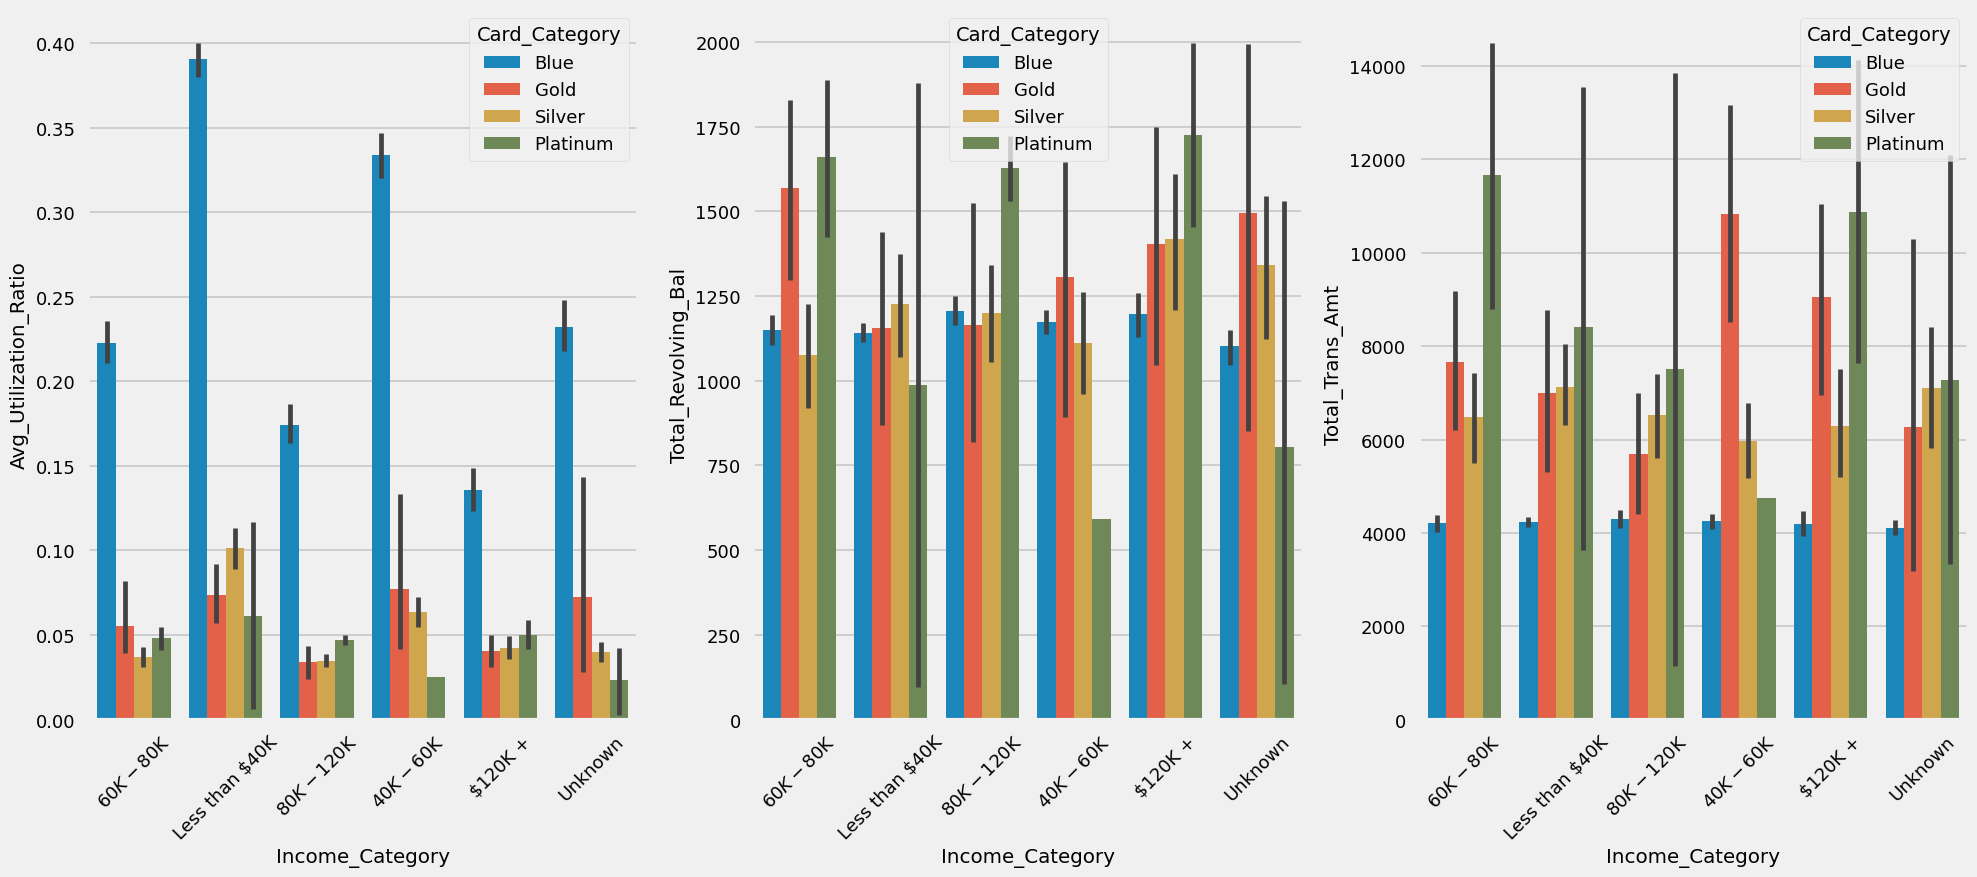

In [33]:
# List of variables to plot
variables_to_plot = ['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Trans_Amt']

plt.figure(figsize=(20, 9))

# Loop over the variables
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Income_Category', y=var, hue='Card_Category', data=df)
    plt.xticks(rotation=45)  # Rotate x-ticks

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

##### Insights:
This trio of bar graphs shows the relationship between income categories, card types, and three features.

- Utilization by Card and Income: The first graph illustrates that cardholders in the 'Less than $40K' income category tend to have a higher average credit utilization ratio across all card types, particularly Blue and Silver cards, indicating heavier reliance on credit lines by lower-income segments.

- Revolving Balance by Card and Income: The middle graph indicates that customers in the '80K – 120K' income bracket tend to carry the highest total revolving balances across all card types, suggesting this group might be more comfortable maintaining a balance on their cards.

- Transaction Amounts by Card and Income: The last graph shows that the '80K – 120K' and '$120K+' income categories generally have higher total transaction amounts, especially among Platinum cardholders, pointing to higher spending habits correlated with higher incomes.

##### 4.4.5 Income Category and Attrition Flag Columns
- How does income category relate to the number and behavior of transactions among existing and attrited customers?

##### Behavioral Differences

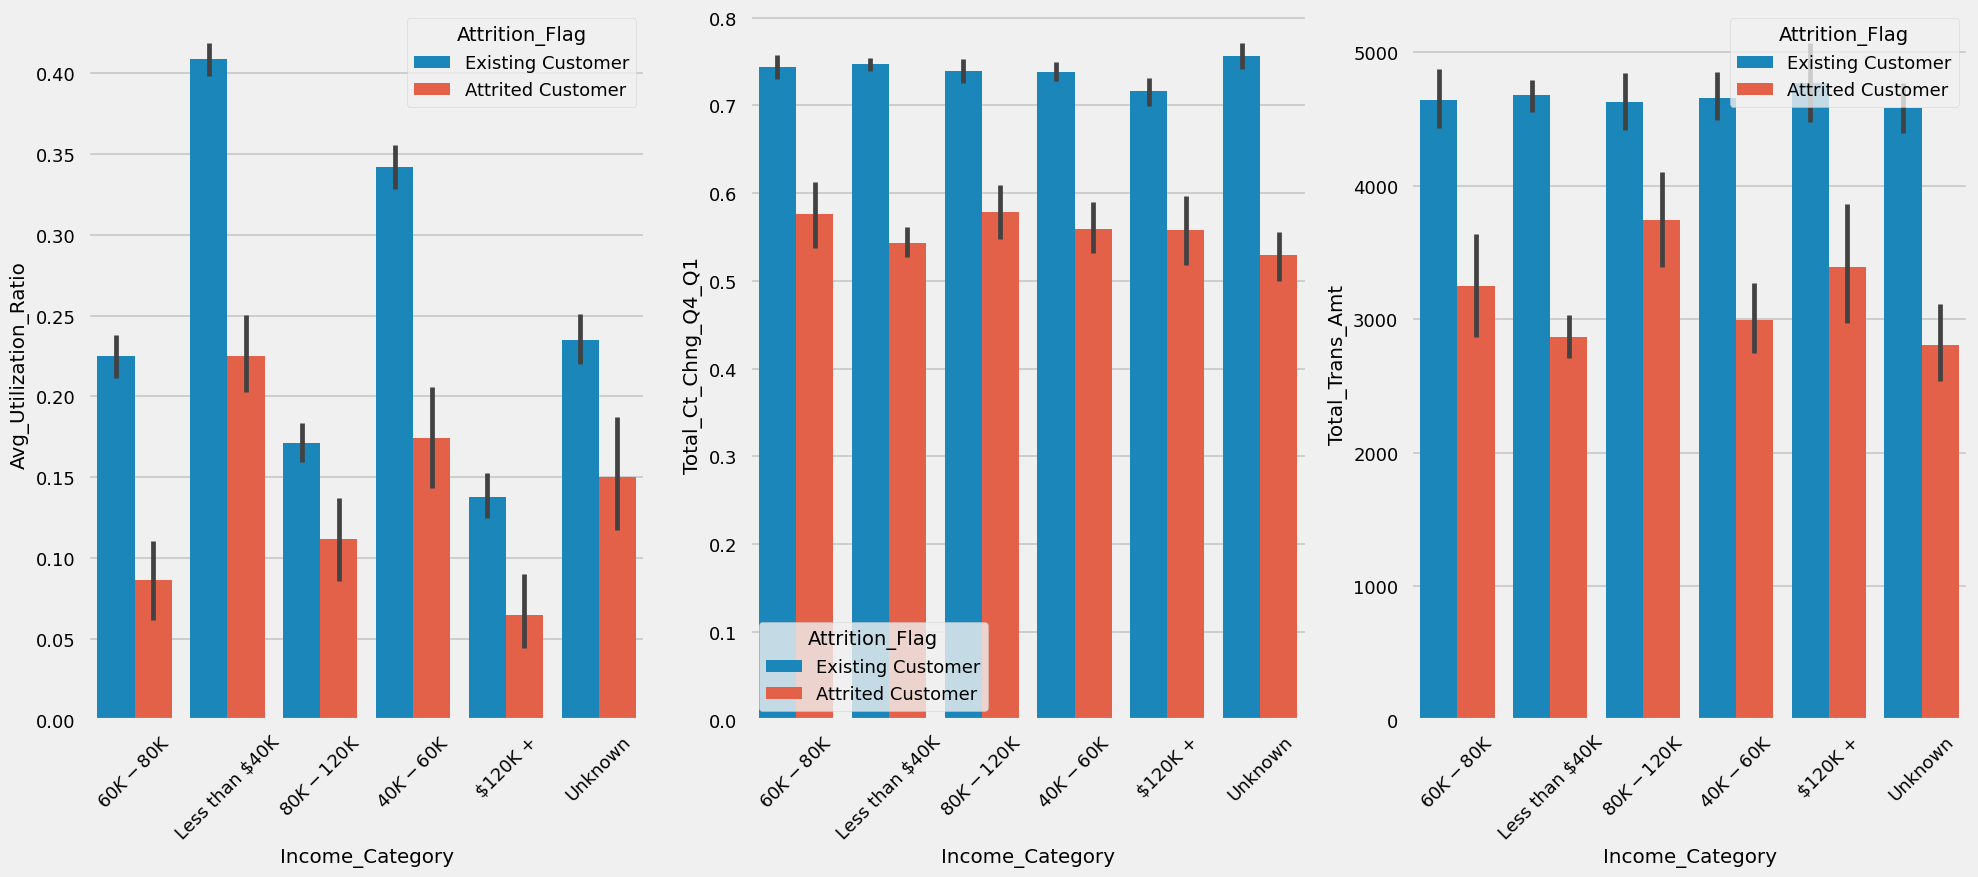

In [34]:
# List of variables to plot
variables_to_plot = ['Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Amt']

plt.figure(figsize=(20, 9))

# Loop over the variables
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Income_Category', y=var, hue='Attrition_Flag', data=df)
    plt.xticks(rotation=45)  # Rotate x-ticks

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

##### Insights:
- Average credit utilization ratio differences between existing and attrited customers are more pronounced in lower and middle-income categories, suggesting that credit management could be a factor in customer retention.

- The quarterly change in transaction amount is generally lower for attrited customers across all income categories, potentially indicating a decline in engagement leading up to customer attrition.

- While existing customers have higher total transaction amounts, the contrast with attrited customers is smaller in higher income categories, implying that transaction volumes might not be as influential on attrition for wealthier clients.

#### 4.5 Multivariate Wise Analysis using Pairplot

In [35]:
numeric_features

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [36]:
#Defining features of interest
num_feat_int = ['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [37]:
#Creating a sample of the data by defining percentage of the total records of the features of interest
sample_perc = 25
n_sample = int(len(df)*(sample_perc/100))
df_pair = pd.concat([df[num_feat_int], df['Attrition_Flag']], axis=1).sample(n_sample, random_state=42)

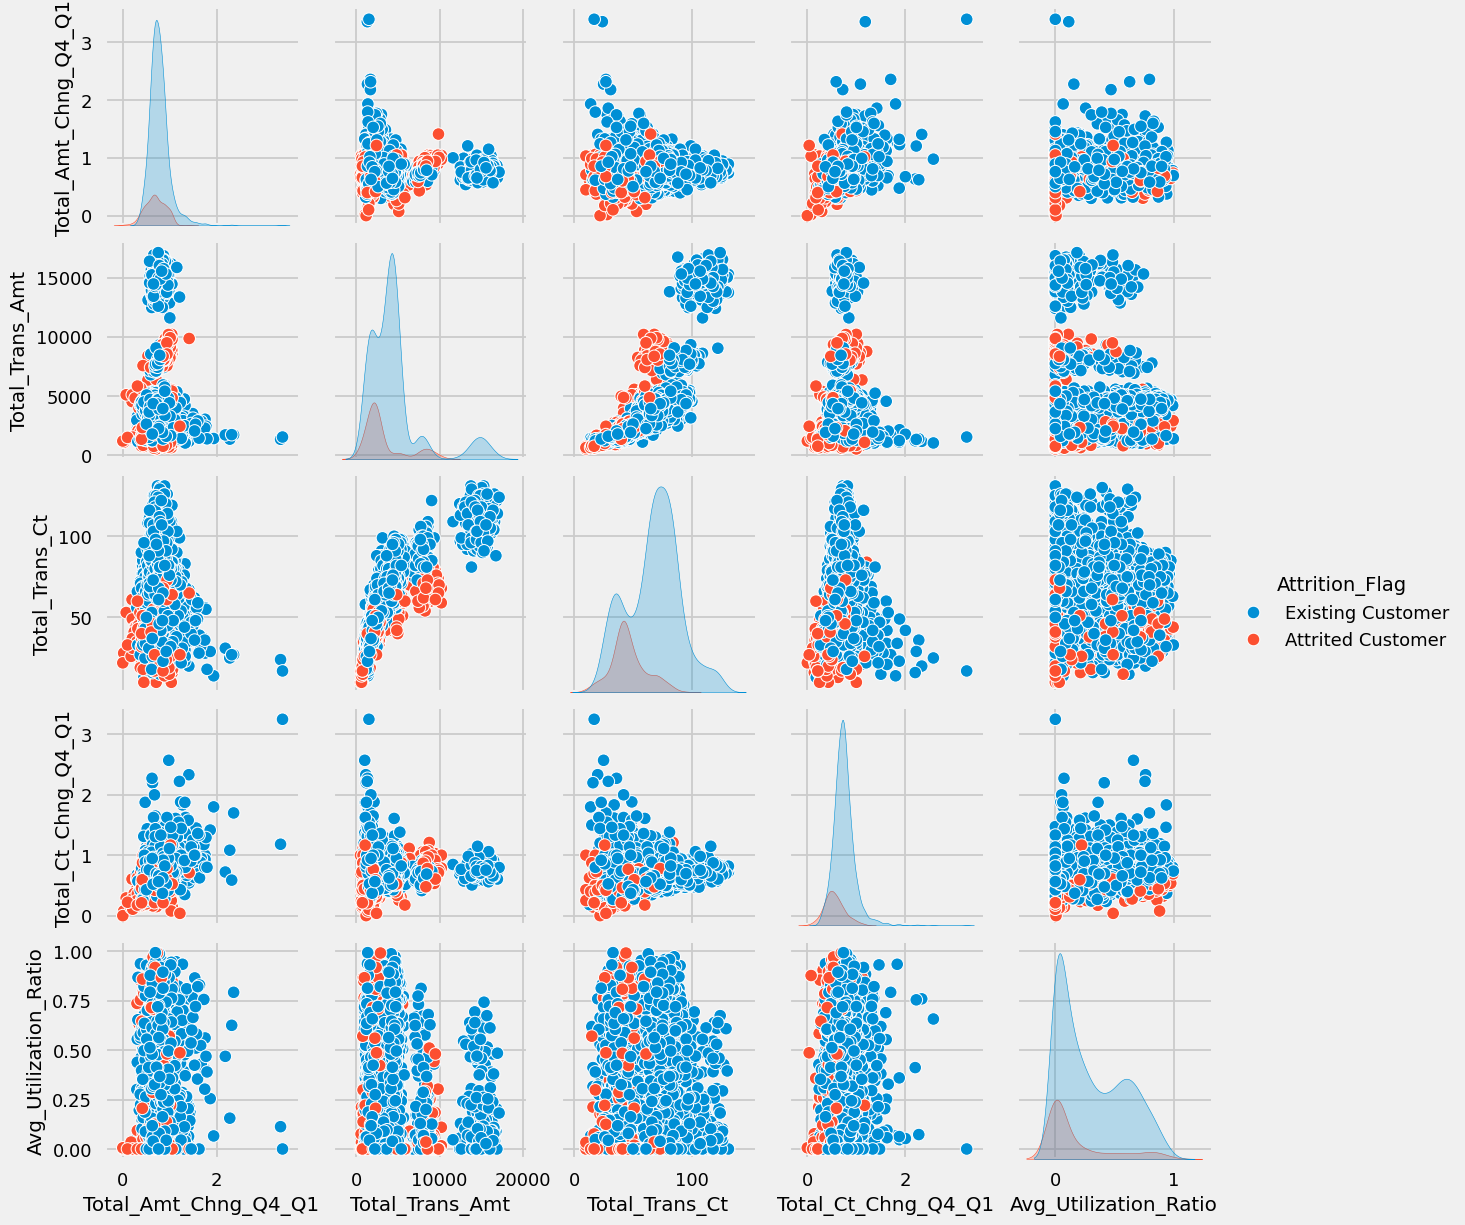

In [38]:
sns.pairplot(df_pair,hue = 'Attrition_Flag')
plt.show()

#### Insights
- Total_Amt_Chng_Q4_Q1 vs. Avg_Utilization_Ratio: There seems to be a slight trend where customers with lower utilization ratios also have lower quarter-over-quarter changes in the total amount, especially noticeable in attrited customers.

- Total_Trans_Amt vs. Total_Trans_Ct: There is a positive correlation between the total transaction amount and the transaction count, which is expected since more transactions would typically correspond to a higher total transaction amount. This trend is consistent for both existing and attrited customers.

- Attrited vs. Existing Customers: Attrited customers generally appear to have lower values for 'Total_Trans_Amt' and 'Total_Trans_Ct' when compared to existing customers (blue), suggesting that lower engagement in transaction activities could be a characteristic of customers who leave.

- Density Distributions: The diagonal plots show the density distributions for each variable, split by attrition status. For most variables, the distribution of existing customers peaks higher, indicating a larger number of existing customers in certain ranges of these variables.

- Total_Amt_Chng_Q4_Q1 vs. Total_Trans_Ct and Total_Trans_Amt: There's a noticeable pattern where attrited customers are clustered at the lower end of quarter-over-quarter changes and total transactions, which may suggest these variables could be predictors for customer attrition.

- Avg_Utilization_Ratio Distributions: The distributions for 'Avg_Utilization_Ratio' differ between existing and attrited customers, with attrited customers often showing a lower utilization ratio, which might indicate they are less engaged with their credit facilities prior to attrition.

- Scatter Patterns: The scatter plots exhibit some clustering of attrited customers, particularly in areas of lower transaction counts and amounts, and lower utilization ratios, which reinforces the point that these factors may have some influence on attrition.